In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
loansIncom=pd.read_csv('loans_income.csv')

In [4]:
loansIncom.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [10]:
sample_data=pd.DataFrame.sample(loansIncom,1000)
sample_data.head()

,x
49760,71000
25800,32055
3796,60000
7596,60000
21386,175000


In [15]:
sample_data.shape

(1000, 1)

In [50]:
sample_5=sample_data.sample(n=1000)
mean_5=np.mean(sample_5)
std_5=np.std(sample_5)
sample_5.head()

,x
42321,73000
12847,43232
17266,35000
38717,70000
40079,40000


In [49]:
y=stats.norm.pdf(loansIncom,mean_5,std_5)
y

array([[1.22218614e-05],
       [1.07248025e-05],
       [7.73078195e-06],
       ...,
       [1.03722628e-05],
       [1.12695930e-05],
       [1.22306547e-05]])

No handles with labels found to put in legend.


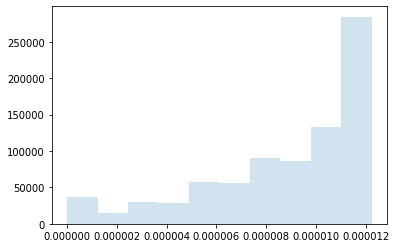

In [47]:
fig, ax = plt.subplots(1, 1)
ax.hist(y, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [3]:
session_time=pd.read_csv('web_page_data.csv')

In [4]:
session_time.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


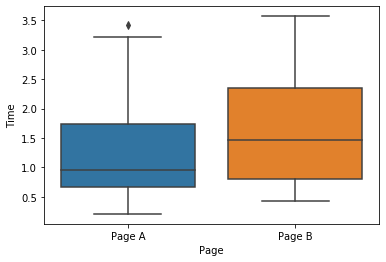

In [6]:
sns.boxplot(x='Page',y='Time',data=session_time)

In [130]:
mean_a=np.mean(session_time.Time[session_time.Page=='Page A'])
mean_b=np.mean(session_time.Time[session_time.Page=='Page B'])
def perm_fum(x,n1,n2):
    n=n1+n2
    idx_b=np.random.randint(1,n,size=n1)
    difference=np.random.randint(1,n,size=len(idx_b))
    idx_a=np.setdiff1d(difference,idx_b)
    mean_diff=np.mean(x[idx_b]-np.mean(x[idx_a]))
    return mean_diff

prem_diffs=[]
for i in range(1000):
    prem_diffs.append(perm_fum(session_time.Time,21,15))
    

0.3566666666666669


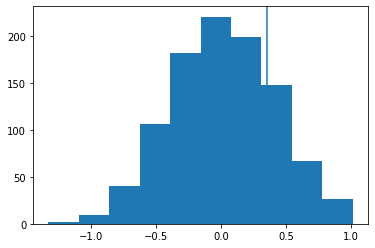

In [131]:
v=mean_b-mean_a
plt.hist(prem_diffs)
plt.axvline(v)
print(v)